# 응용통계학 (14주차) 6월 17일
> 

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Applied Statistics]

In [1]:
#hide
options(jupyter.plot_scale=4)
options(repr.plot.width=8,repr.plot.height=6,repr.plot.res=300)
#options(jupyter.rich_display=FALSE)
#options(max.print=1000)

## 비모수적 방법

- 모형에 대한 사전 설정/가정을 최소화
- 데이터 자체의 특성만을 이용하여 연관성을 추정하고자 함

*“Let the data speak for themselves”*

- 커널 추정법은 비모수적 방법 중 하나로 g에 대해서는 적당히 부드러운(smooth) 성질을 가진다는 가정만 상정
- 자료 특성의 국소적인 변화를 모수적 방법에 비해 민감하게 추정할 수 있음

In [2]:
library(np)
data("cps71")
attach(cps71)

Nonparametric Kernel Methods for Mixed Datatypes (version 0.60-11)
[vignette("np_faq",package="np") provides answers to frequently asked questions]
[vignette("np",package="np") an overview]
[vignette("entropy_np",package="np") an overview of entropy-based methods]



### 예시: 임금데이터

X:연령

Y:임금

35세의 평균임금

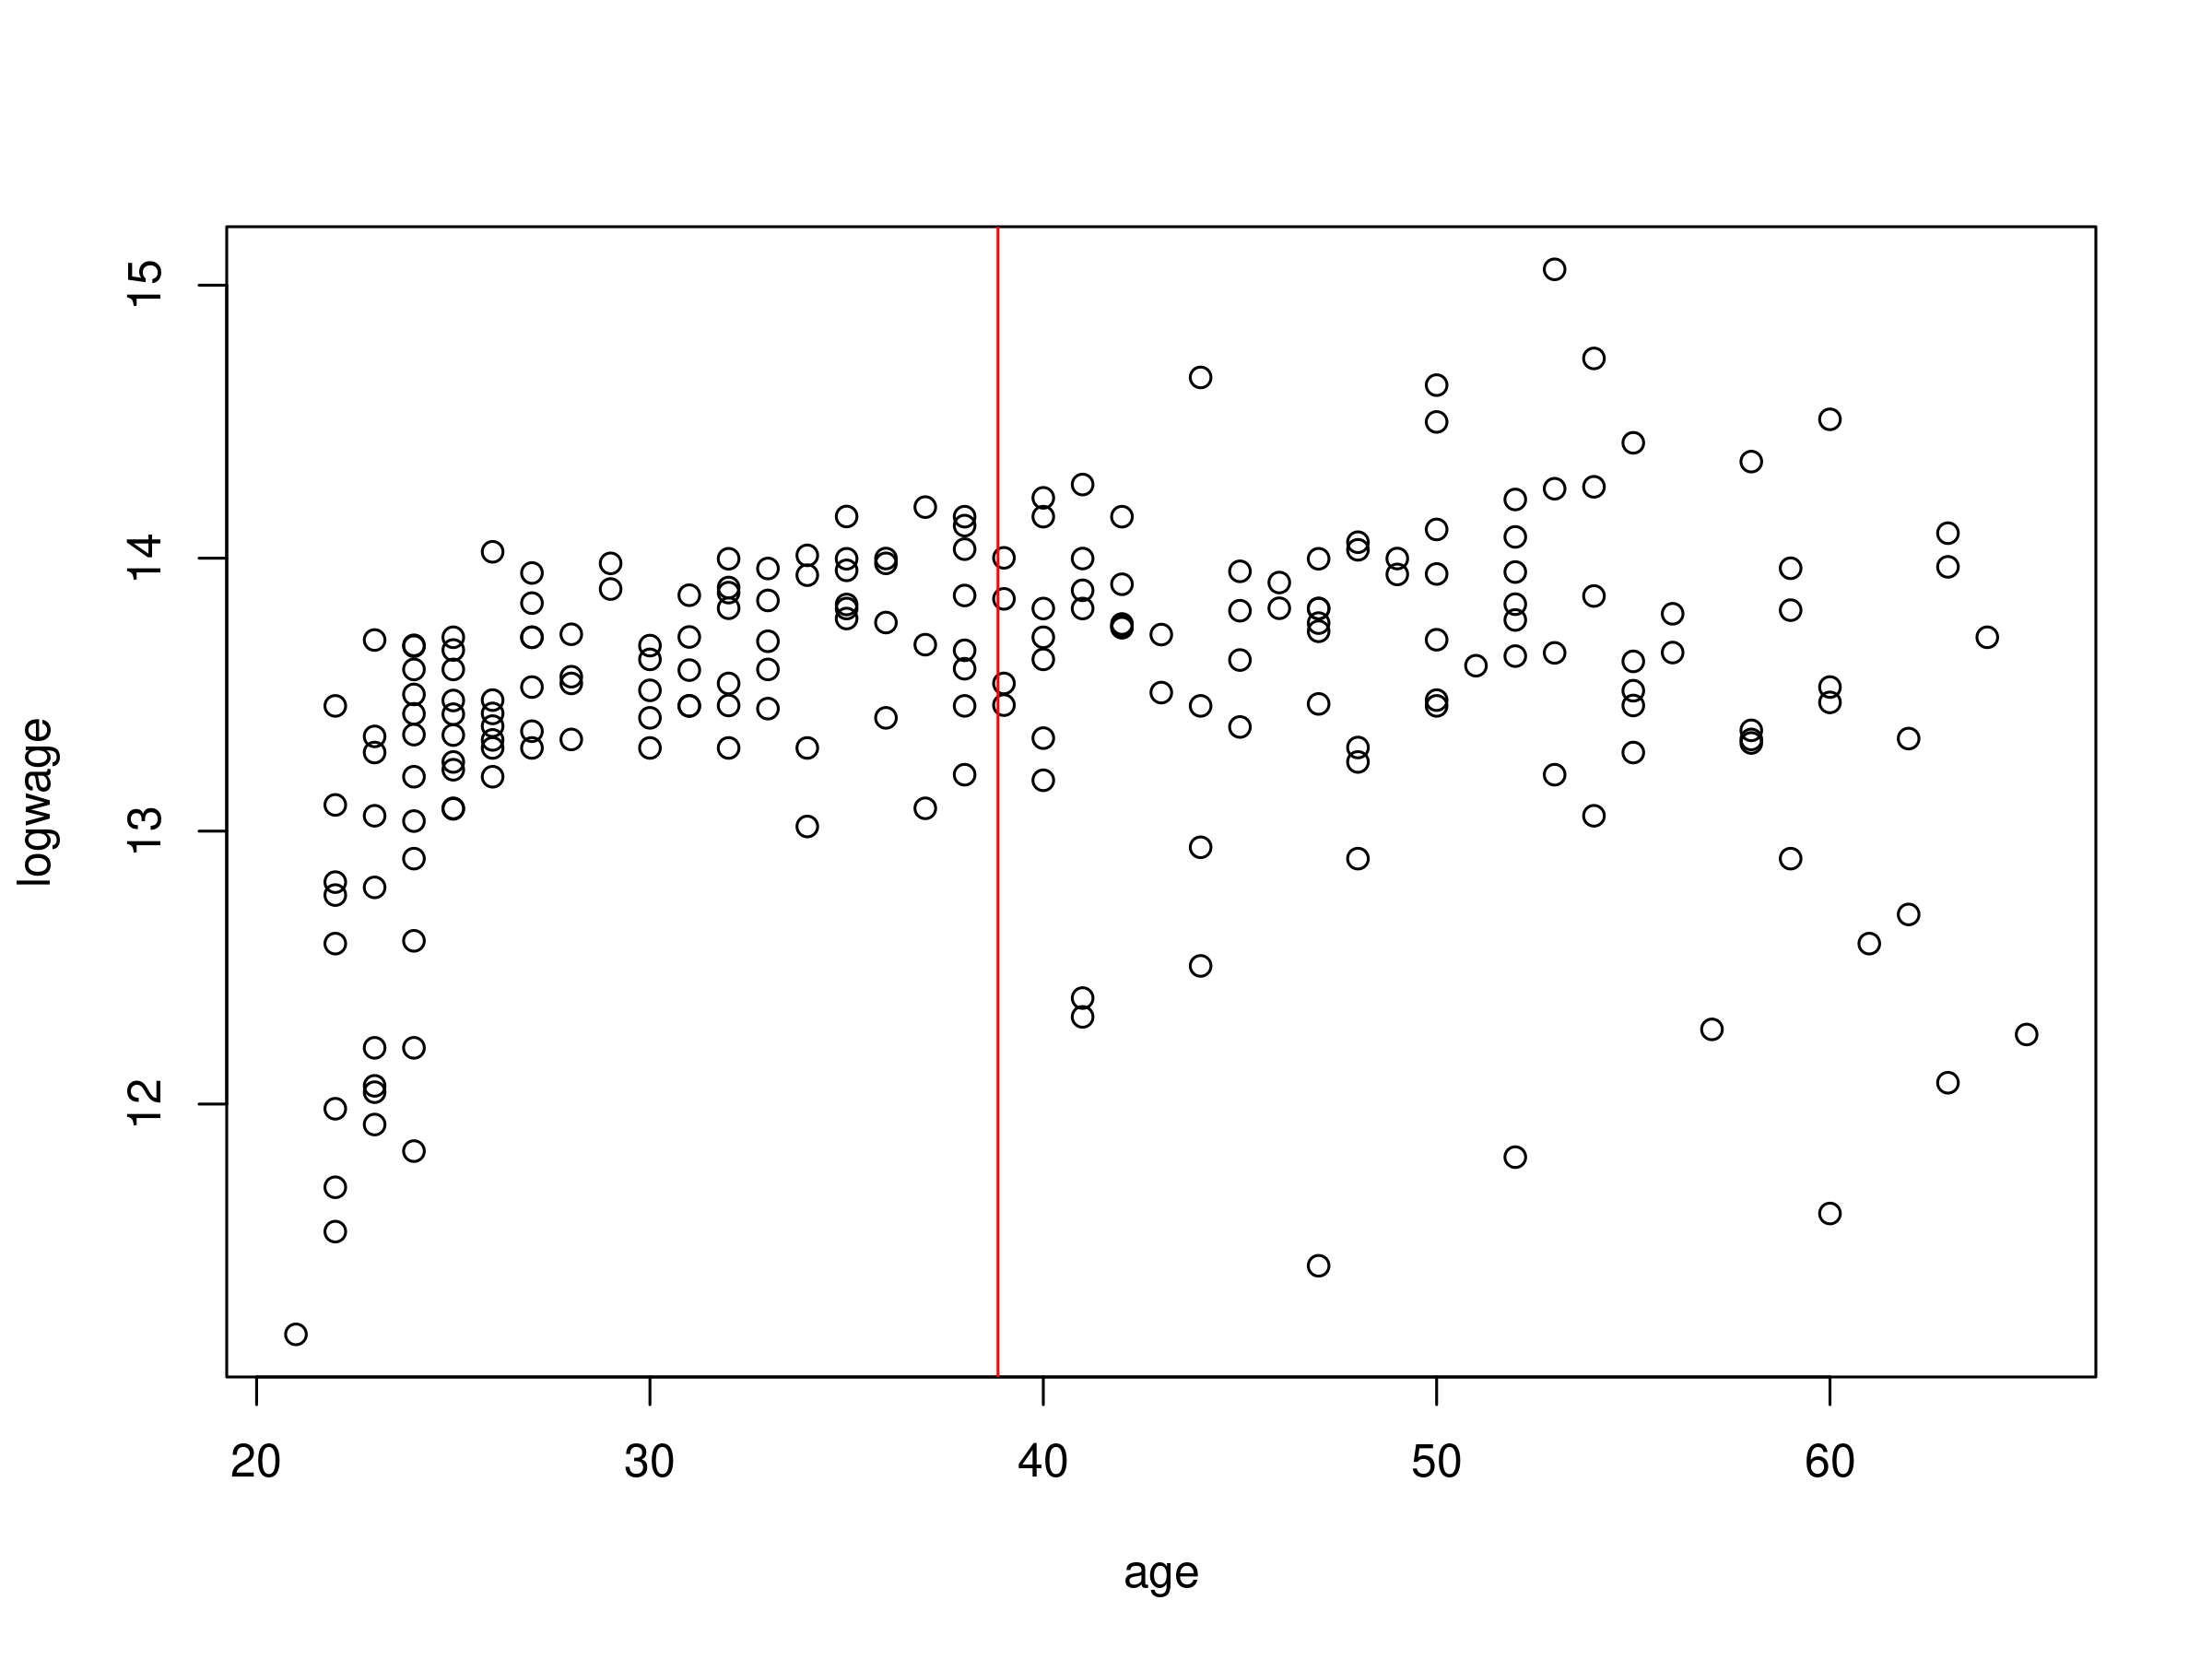

In [27]:
plot(age,logwage)
abline(v=mean(age),col='red')

특성을 만족하는 관측치만 활용
- 연령별 임금 추정치
- 연령에 따른 변화가 지나치게 심하게 나타남

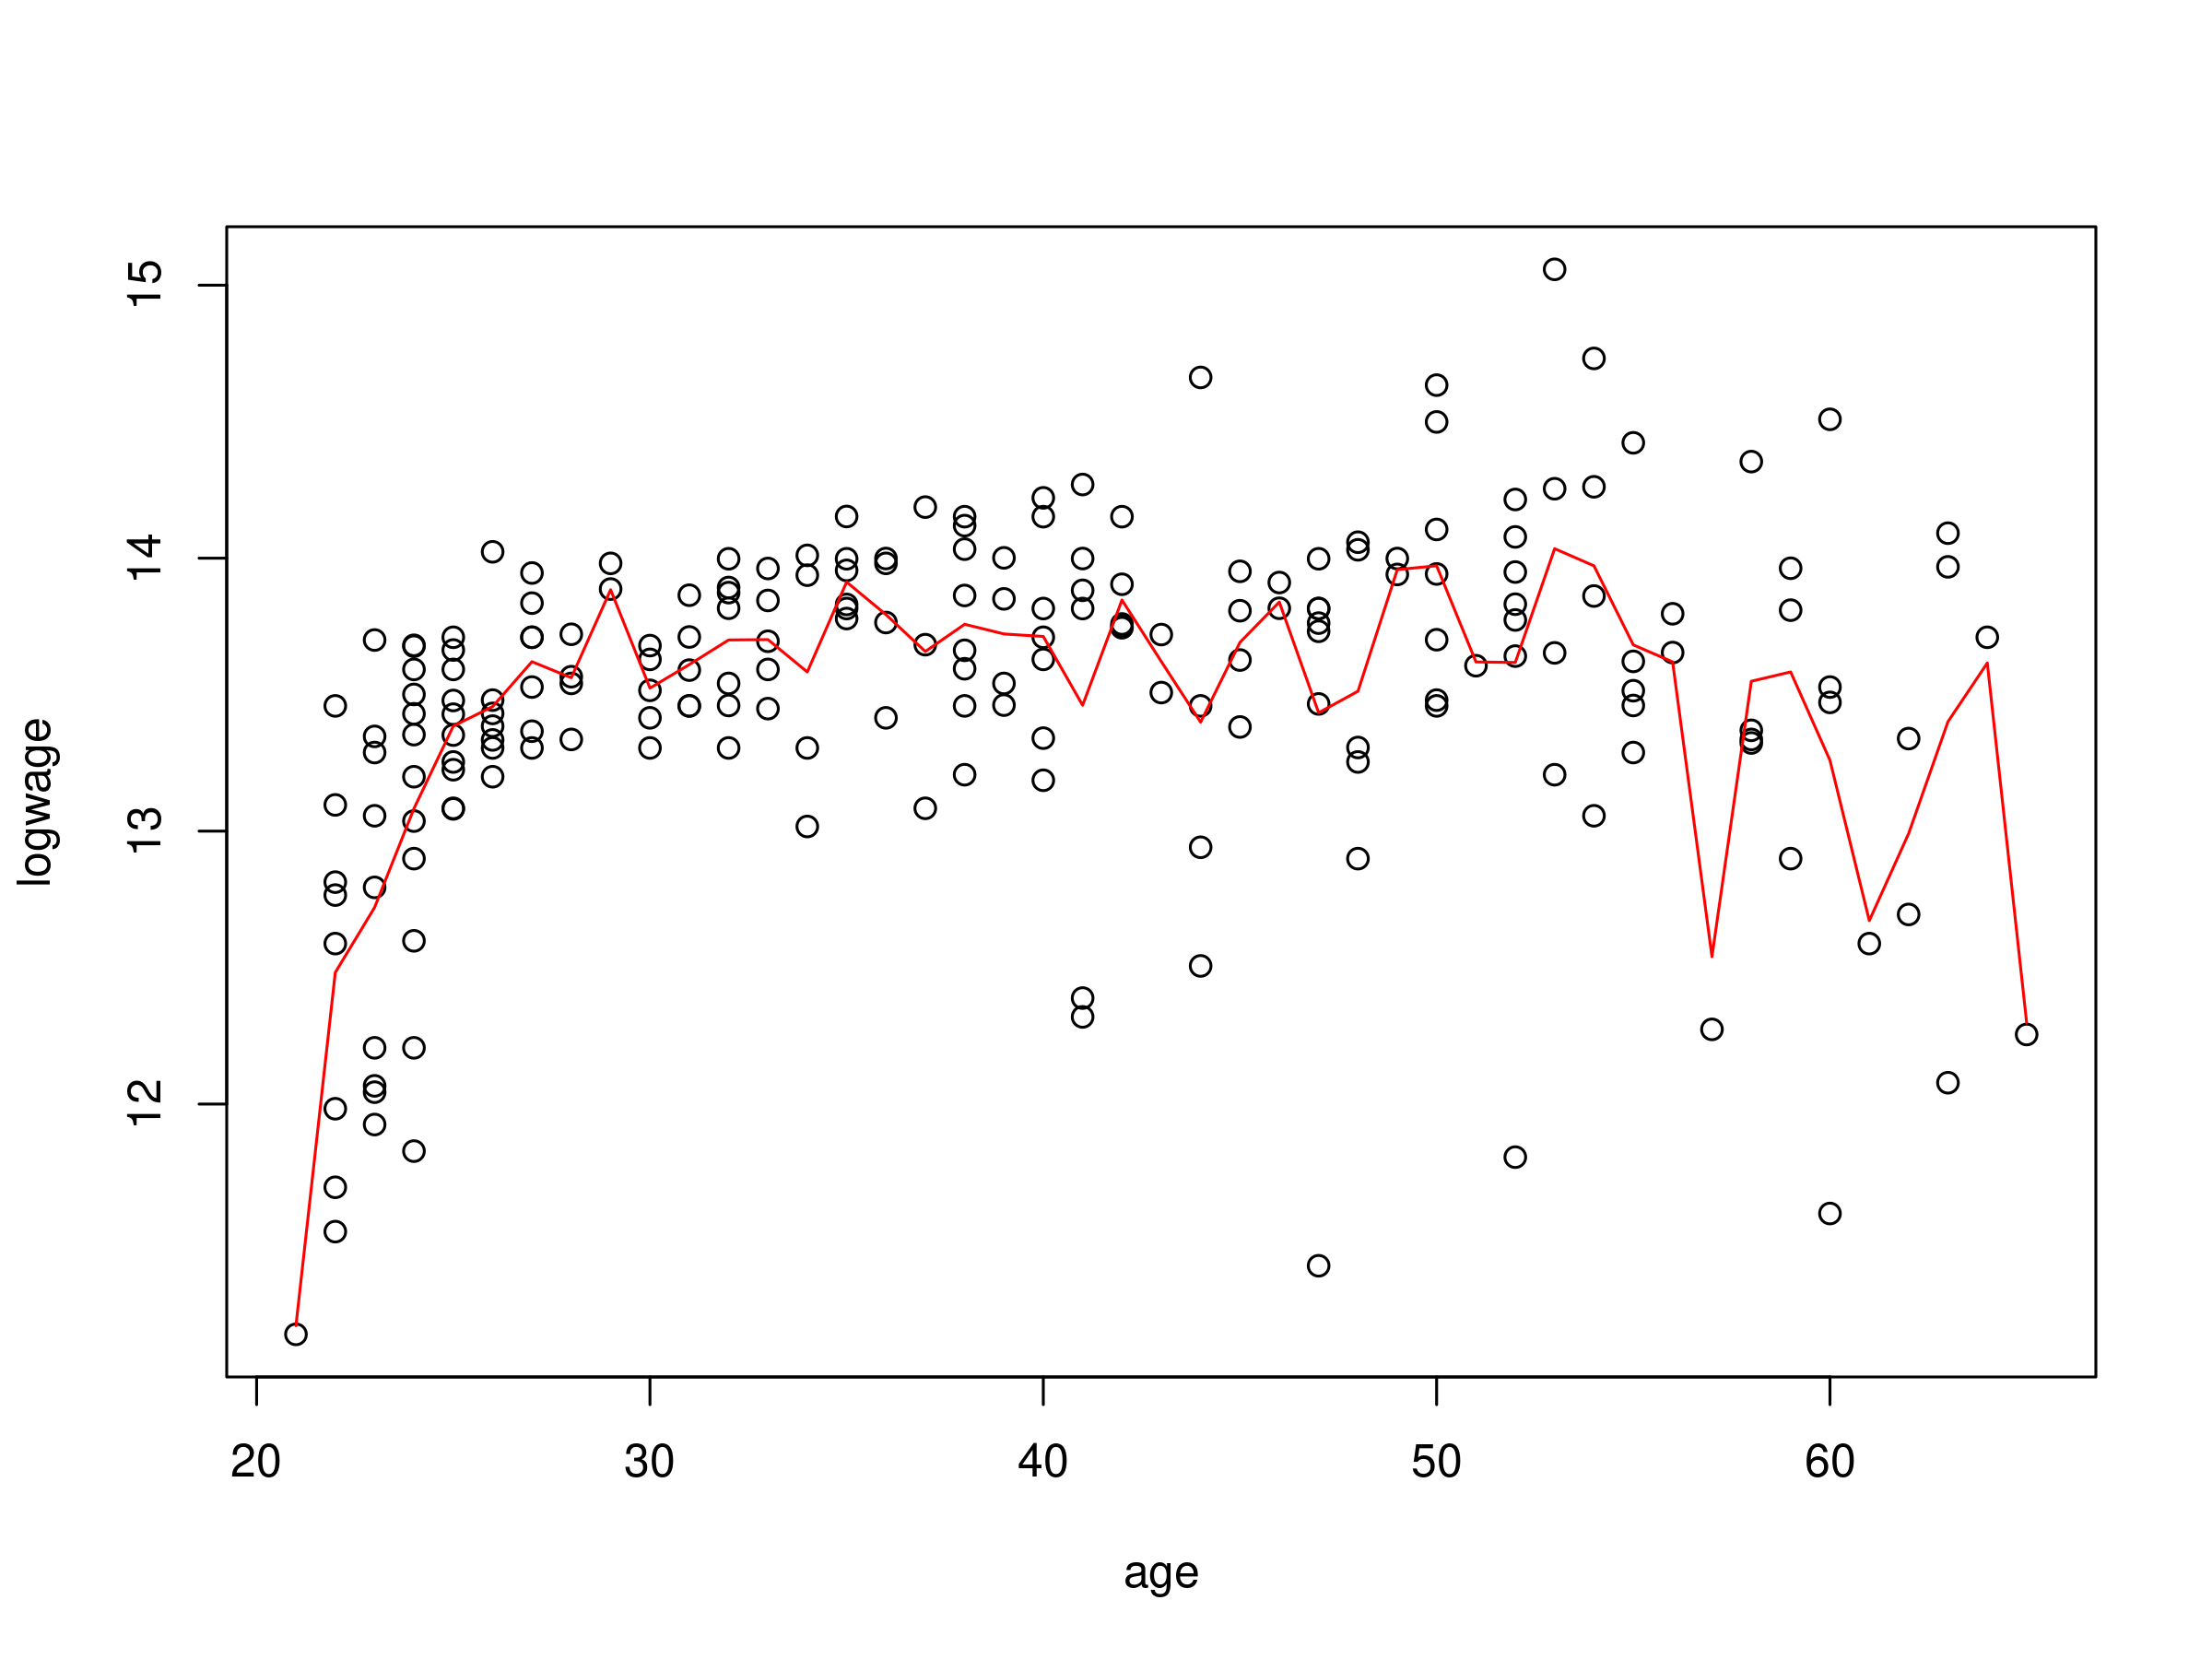

In [51]:
plot(age,logwage)
lines(smooth.spline(age,logwage,spar = 0.1),col='red')

### 국소 평균

- 연령별 평균에 의한 추정은 다음과 같은 문제를 가짐
    - 추정된 g가 연속이라는 보장이 없음
    - 특정 연령에서의 관측치가 없거나 부족한 경우 추정이 불안정
- 연령이 비슷하면 평균임금도 비슷하지 않을까?
    - 특정 연령의 평균연령 추정을 위해 이웃한 관측치를 활용
- 국소화 (localizing)

In [ ]:
reg.npbw <- npregbw(logwage ~ age, regtype = "lc")
reg.np <- npreg(reg.npbw)

In [4]:
reg.npbw


Regression Data (205 observations, 1 variable(s)):

                   age
Bandwidth(s): 1.892157

Regression Type: Local-Constant
Bandwidth Selection Method: Least Squares Cross-Validation
Formula: logwage ~ age
Bandwidth Type: Fixed
Objective Function Value: 0.316055 (achieved on multistart 1)

Continuous Kernel Type: Second-Order Gaussian
No. Continuous Explanatory Vars.: 1


In [5]:
reg.np


Regression Data: 205 training points, in 1 variable(s)
                   age
Bandwidth(s): 1.892157

Kernel Regression Estimator: Local-Constant
Bandwidth Type: Fixed

Continuous Kernel Type: Second-Order Gaussian
No. Continuous Explanatory Vars.: 1


bws를 2,3,10,0.3.. 바꿔가면서 시도

bws 빼면 bws 자동으로 계산한다. 

In [6]:
nw <- npreg(logwage ~ age, regtype = "lc",bws=2)

In [7]:
nw


Regression Data: 205 training points, in 1 variable(s)
              age
Bandwidth(s):   2

Kernel Regression Estimator: Local-Constant
Bandwidth Type: Fixed

Continuous Kernel Type: Second-Order Gaussian
No. Continuous Explanatory Vars.: 1


이렇게도 쓸 수 있다. bws = reg.npbw

- lc: local constant
- ll: local linear

kernal option: ckertype=?

In [8]:
ll <- npreg(logwage ~ age,regtype="ll",bws=2)

In [9]:
ll


Regression Data: 205 training points, in 1 variable(s)
              age
Bandwidth(s):   2

Kernel Regression Estimator: Local-Linear
Bandwidth Type: Fixed

Continuous Kernel Type: Second-Order Gaussian
No. Continuous Explanatory Vars.: 1


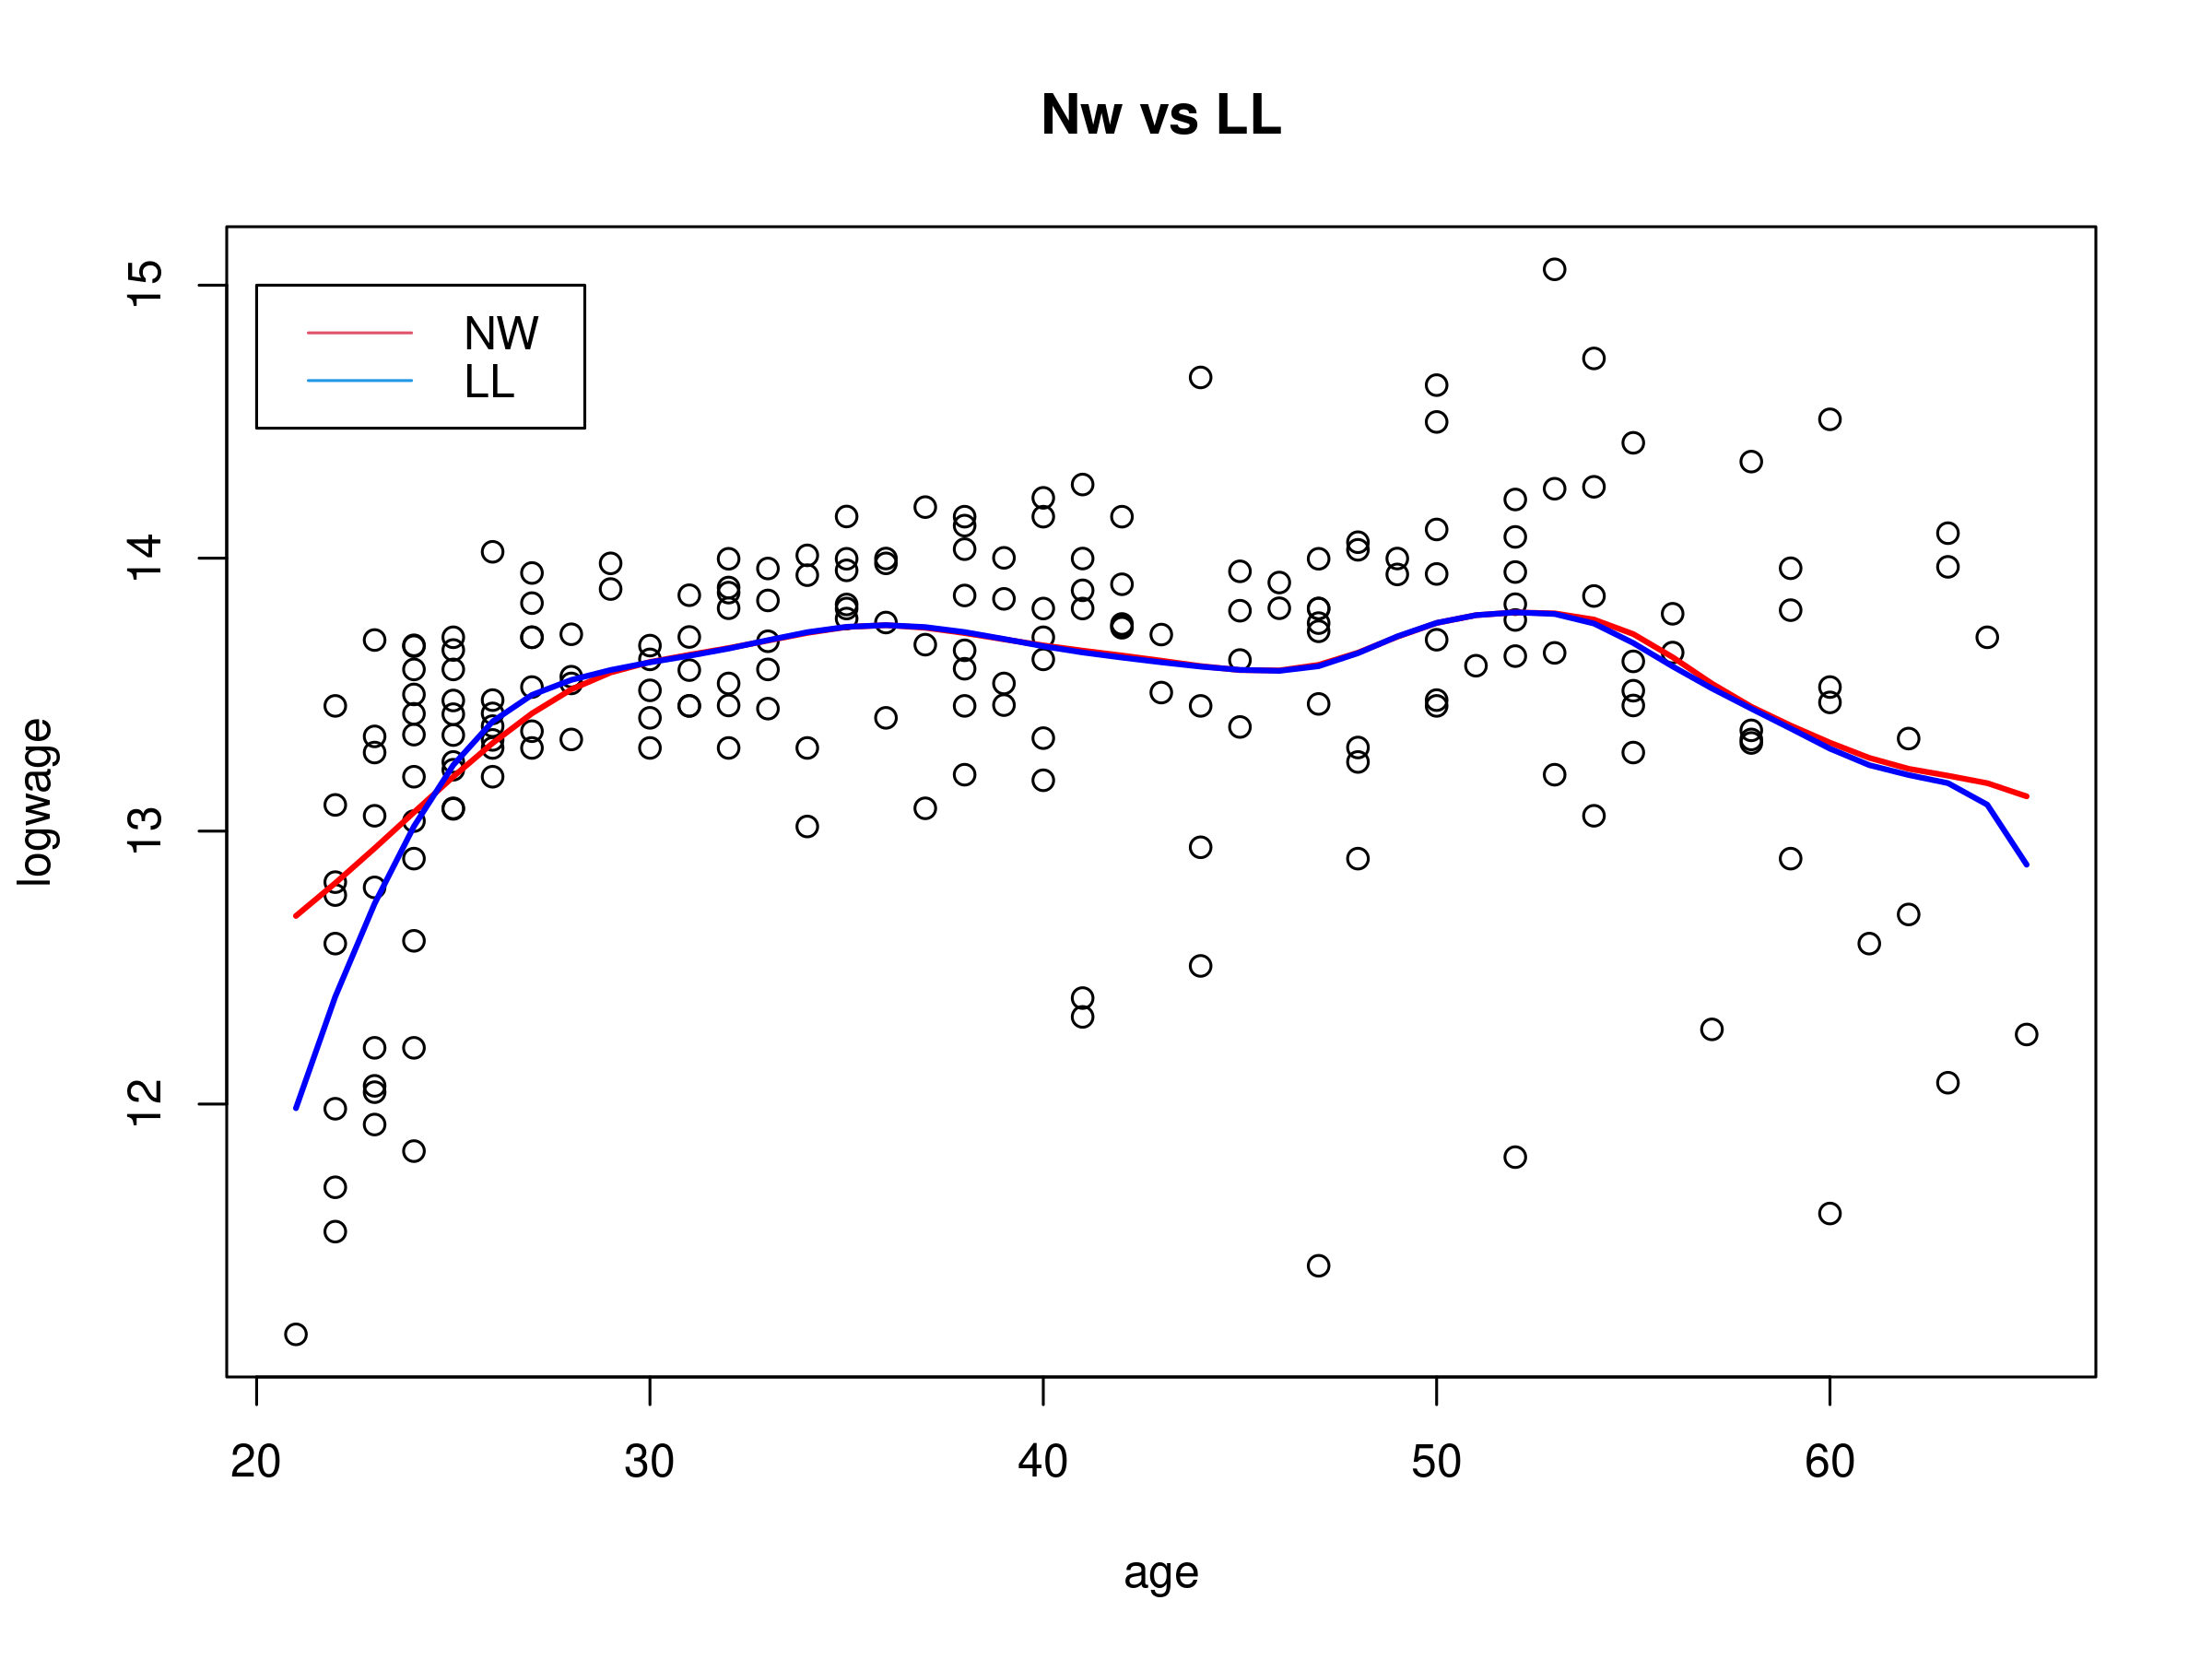

In [10]:
plot(age,logwage,main="Nw vs LL")
lines(age,nw$mean,col="red",lwd=2)
lines(age,ll$mean,col="blue",lwd=2)
legend(20,15,c("NW","LL"),col=c(2,12),lty=c(1,1))

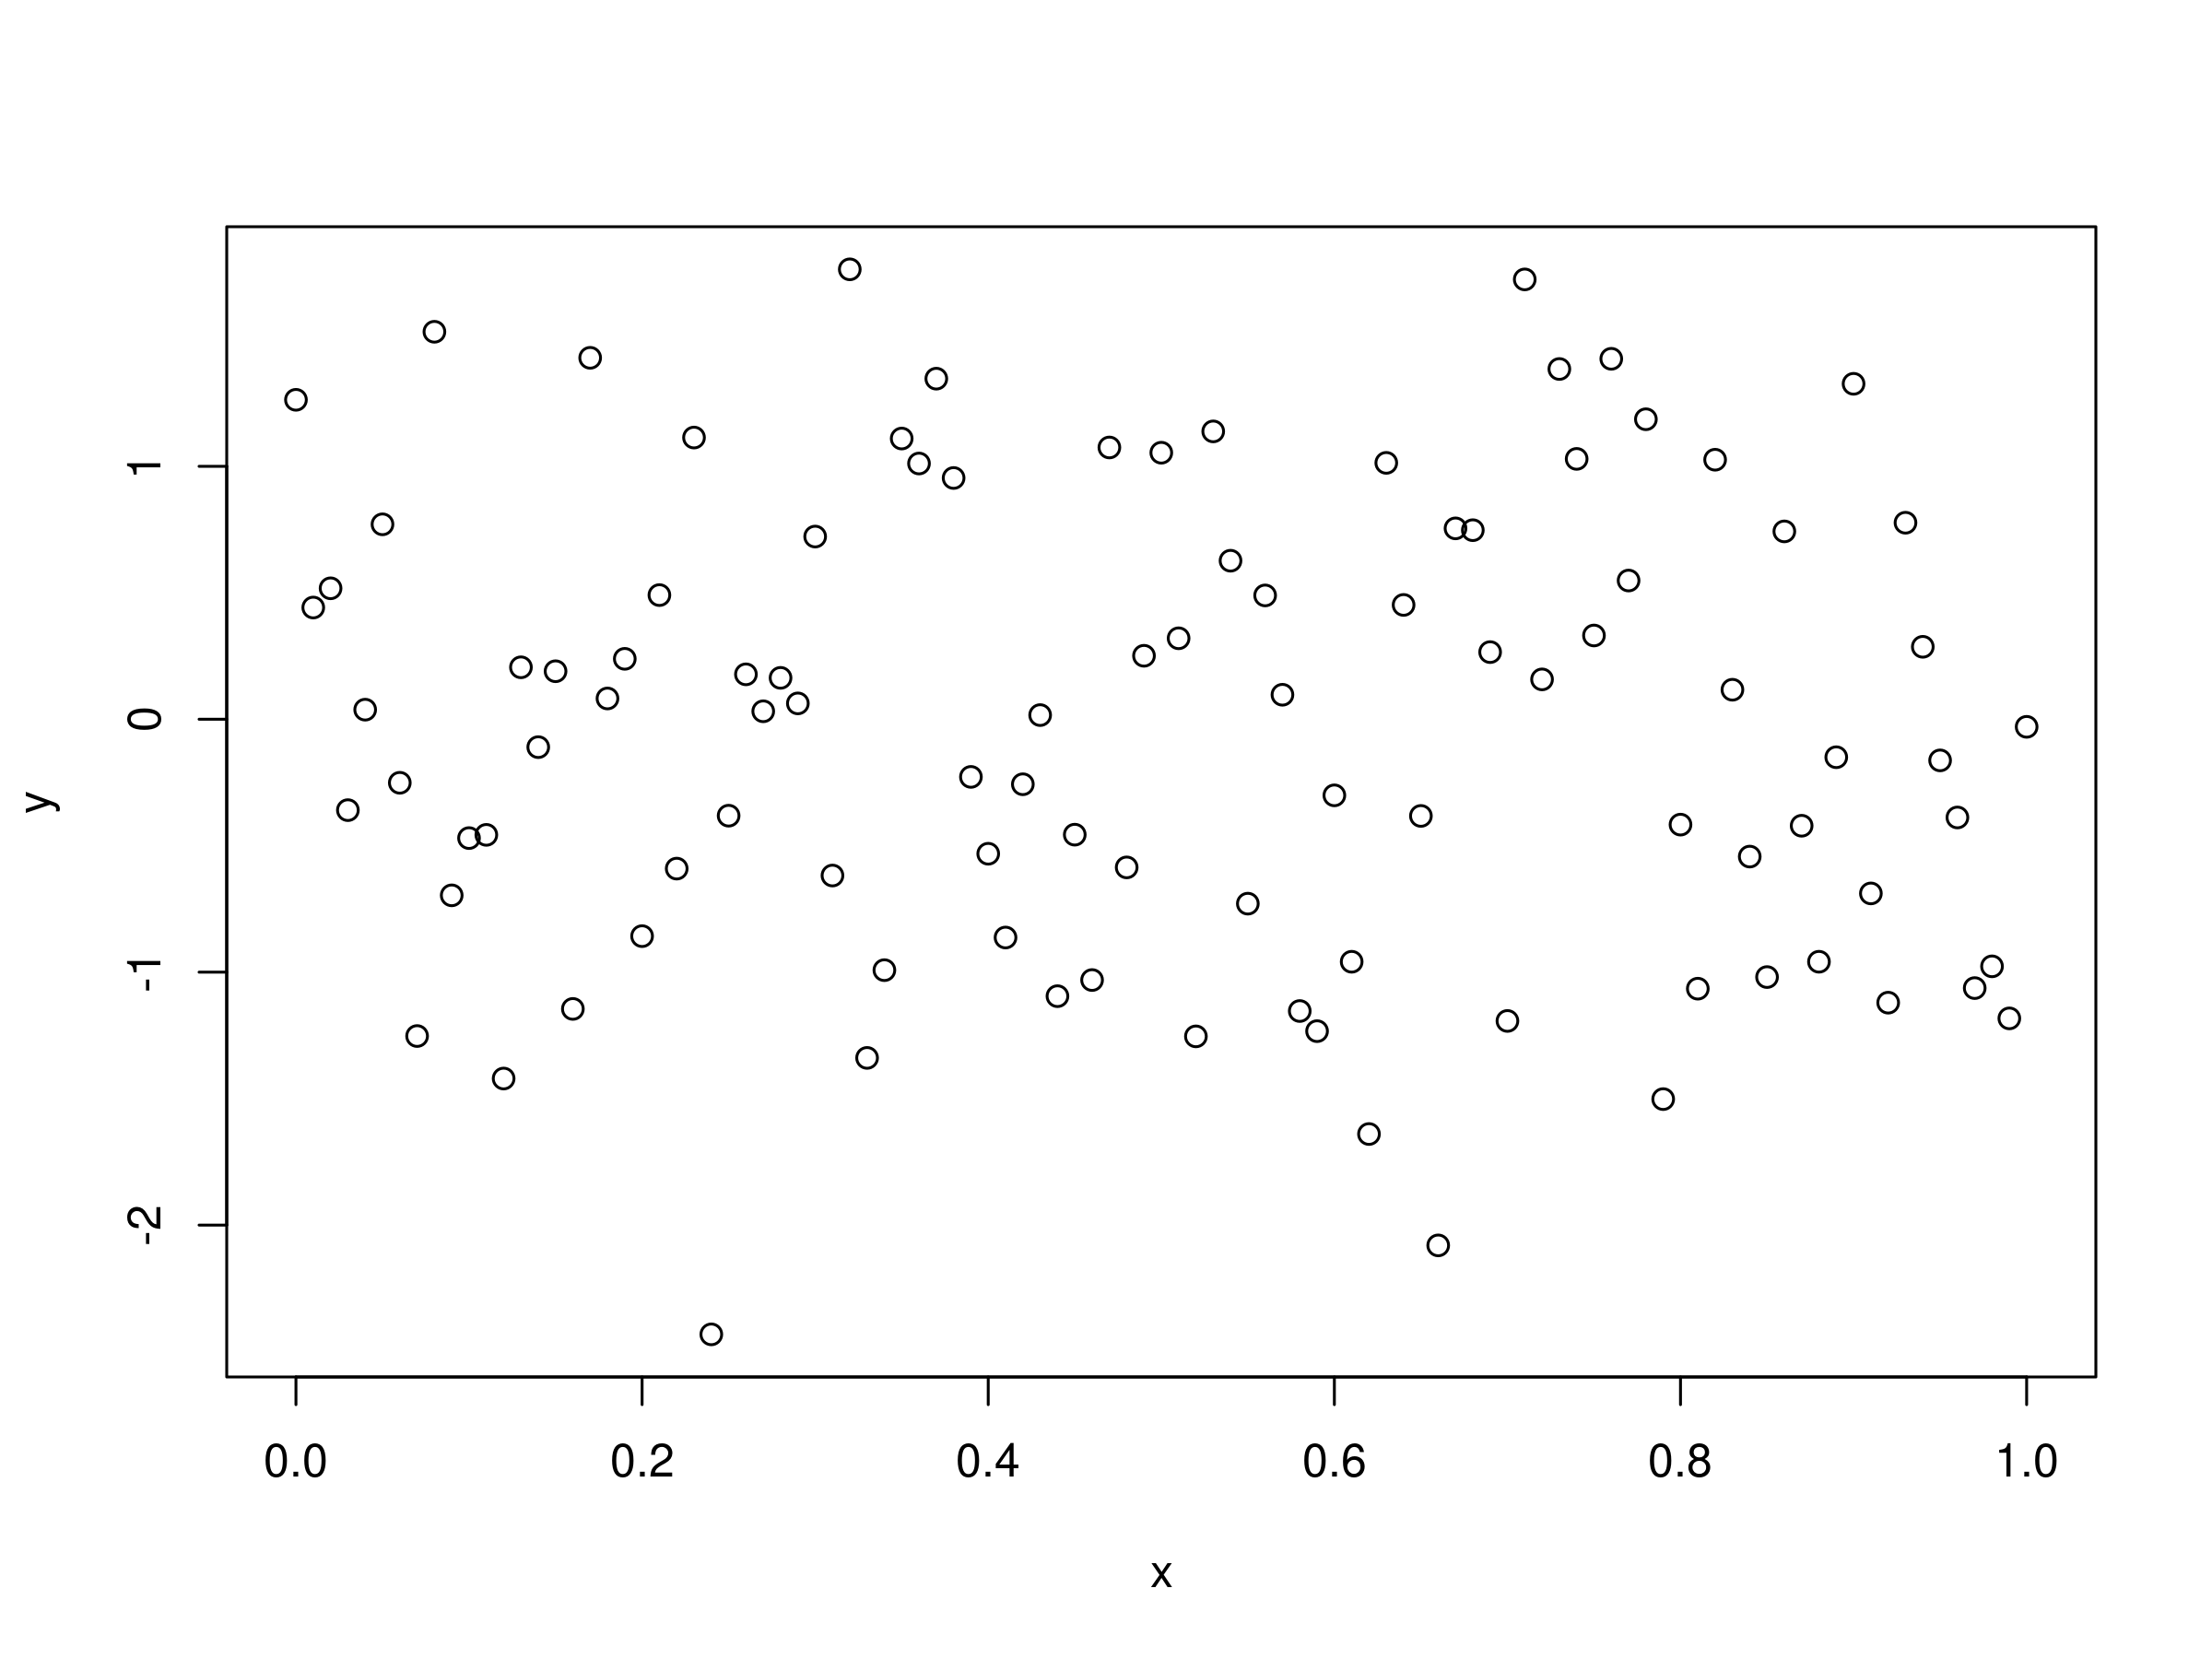

In [11]:
# 함수적 관계 없을 때, 상수 관계밖에 없을 때, 선형 관계 없을때
x = seq(0,1,0.01)
y=rnorm(101)
plot(x,y)

In [12]:
nw = npreg(y~x, regtype = "lc",bws=0.5)

In [13]:
nw


Regression Data: 101 training points, in 1 variable(s)
                x
Bandwidth(s): 0.5

Kernel Regression Estimator: Local-Constant
Bandwidth Type: Fixed

Continuous Kernel Type: Second-Order Gaussian
No. Continuous Explanatory Vars.: 1


In [14]:
ll <- npreg(y~x,regtype = "ll",bws=0.5)

In [15]:
ll


Regression Data: 101 training points, in 1 variable(s)
                x
Bandwidth(s): 0.5

Kernel Regression Estimator: Local-Linear
Bandwidth Type: Fixed

Continuous Kernel Type: Second-Order Gaussian
No. Continuous Explanatory Vars.: 1


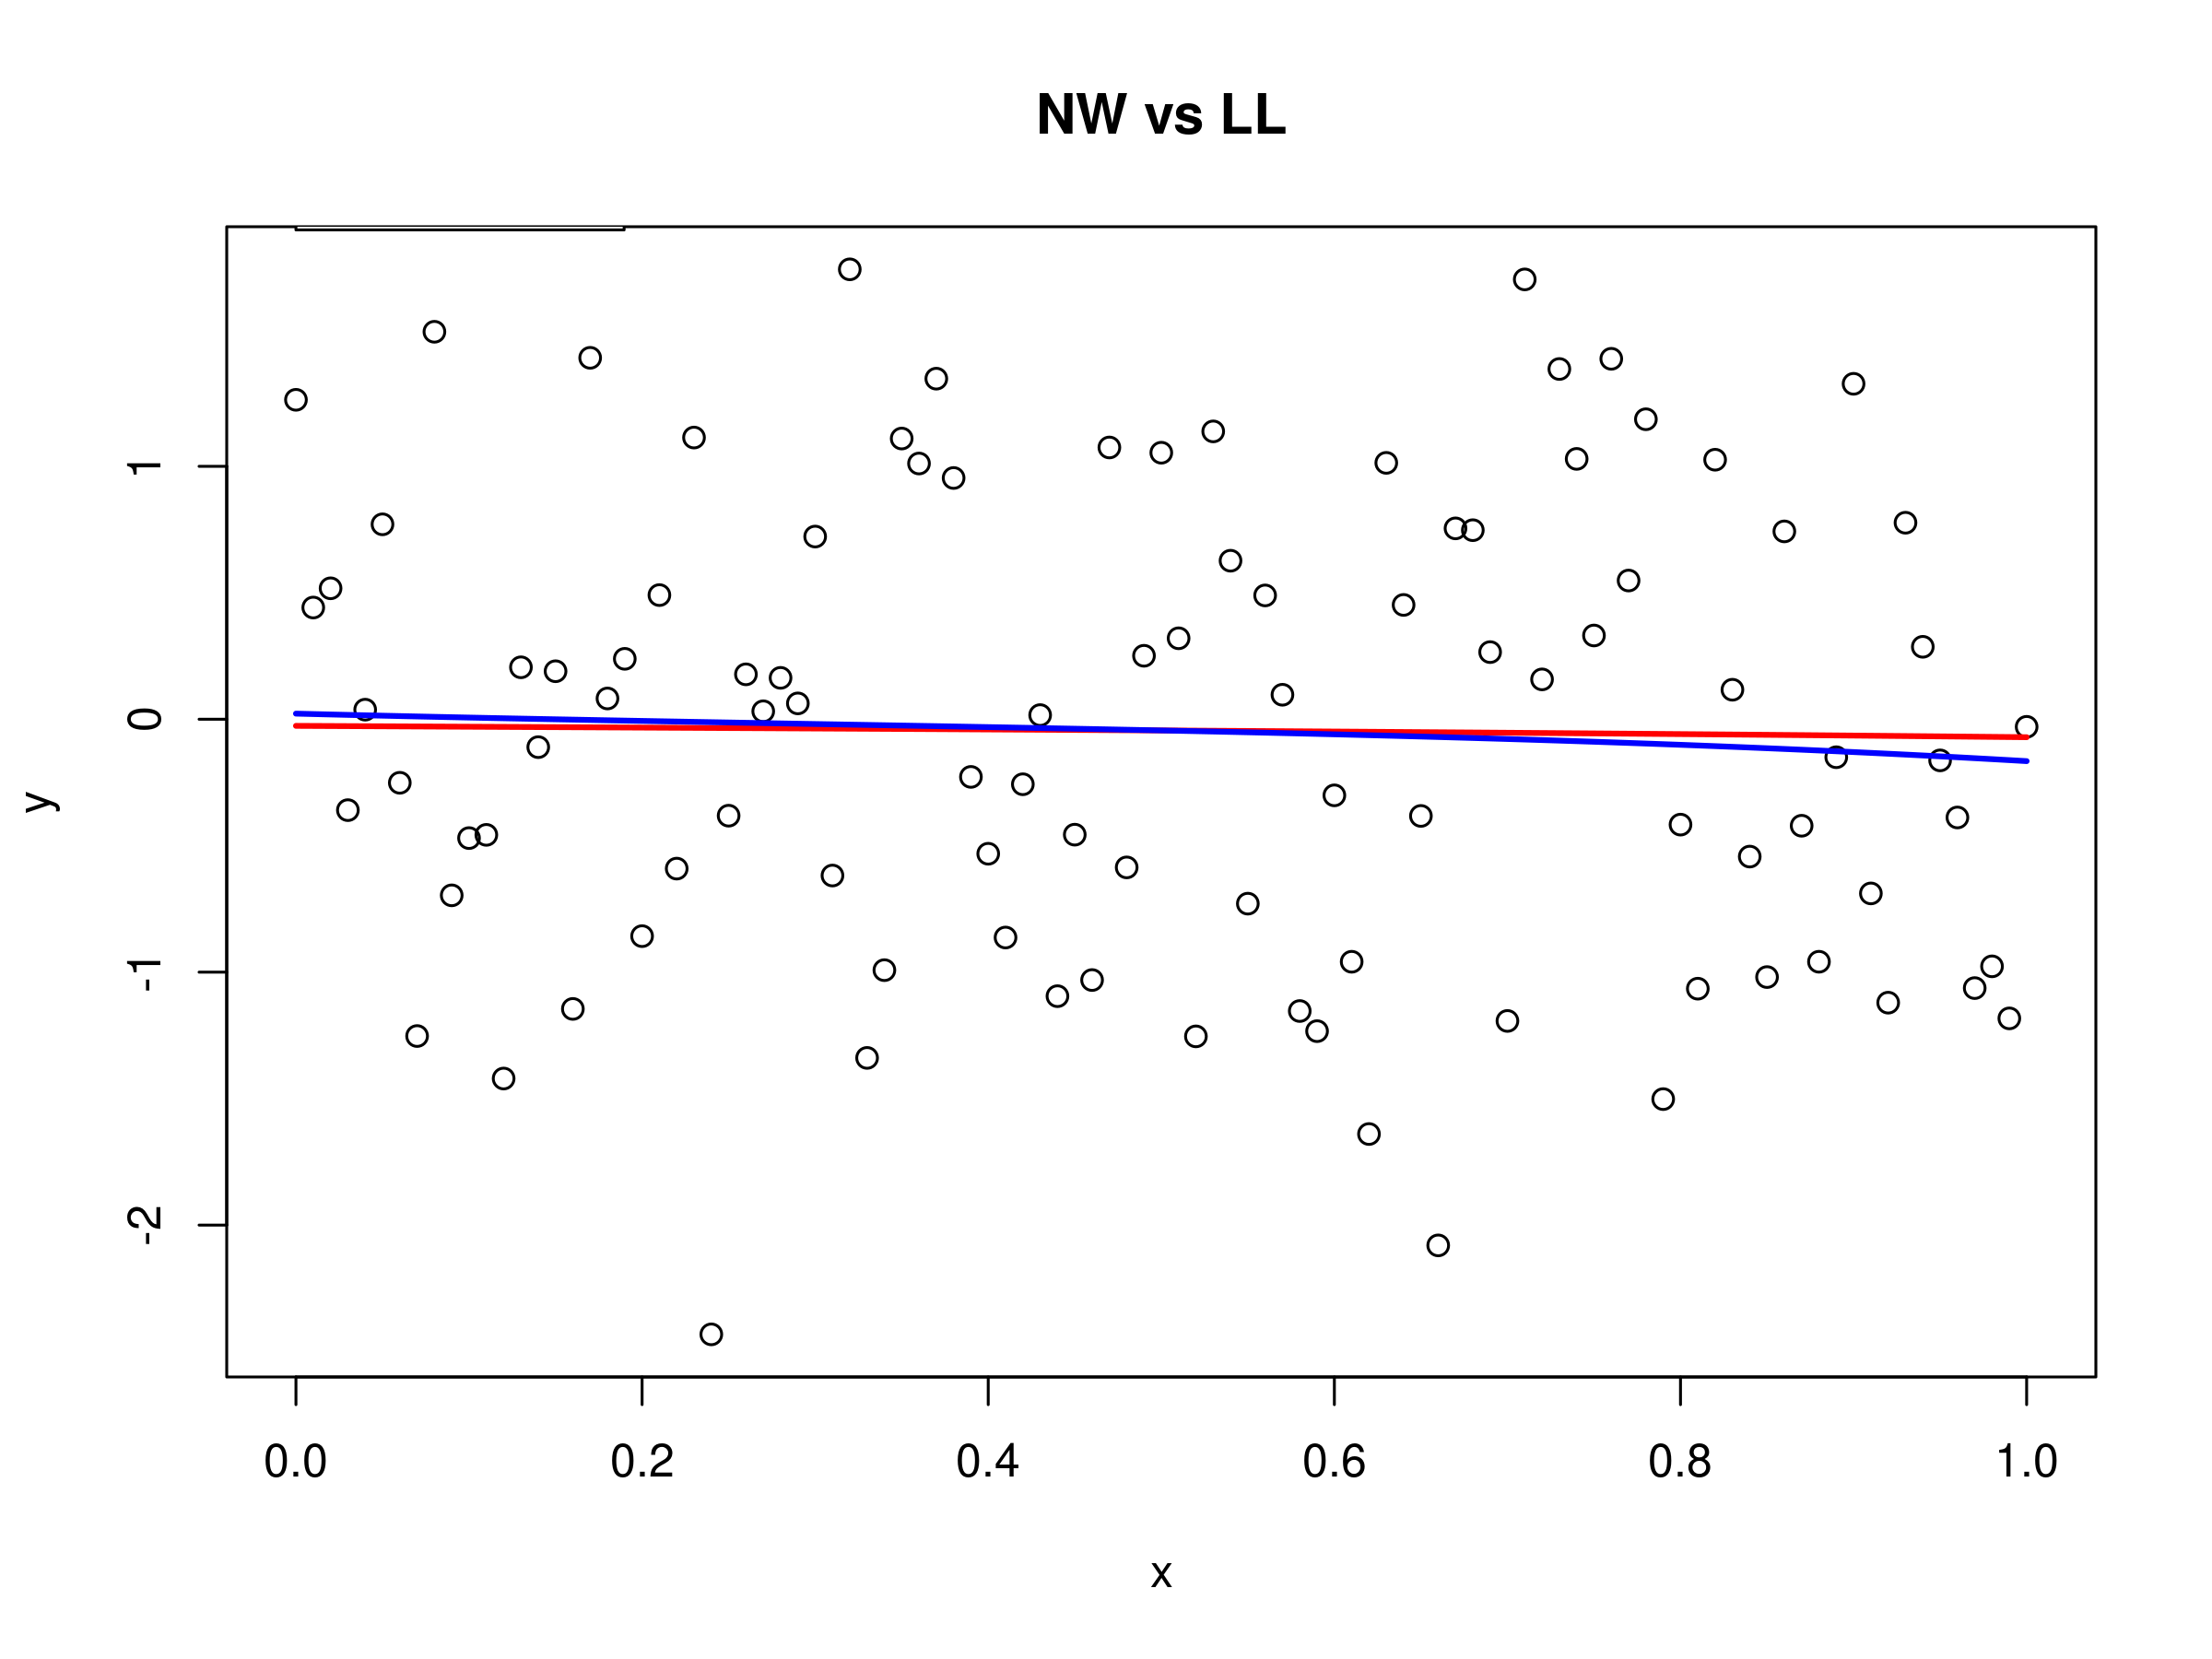

In [16]:
plot(x,y,main="NW vs LL")
lines(x,nw$mean,col="red",lwd=2)
lines(x,ll$mean,col="blue",lwd=2)
legend(0,2.5,c("NW","LL"),col=c(2,12),lty=c(1,1))